In [3]:
# =============================================================================
# =============================================================================
# # 문제 01 유형(DataSet_01.csv 이용)
#
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================
# =============================================================================


In [2]:
import pandas as pd

data1 = pd.read_csv('dataset/DataSet_01.csv')
data1

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [6]:
#%%

# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

In [17]:
data1.isnull().sum()

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

In [8]:
# 실제로도 아무것도 없고 존재는 하지만 껍데기만 있는 것 까지 검색
data1.isnull().sum().sum()

26

In [11]:
# 실제로 아무 것도 없는 것 확인 na
data1.isna().sum().sum()

26

In [45]:
# 결측치가 들어간 행 찾기
data1.isnull().sum(axis=1)
# sum(axis=1) 행마다 카운트를 묶은 후 sum() 을 하면 행별로 결측치 행 수 셀 수 있음
(data1.isnull().sum(axis=1)>=1).sum()

26

In [ ]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

# 상관관계 : 수치적으로 풀어서 설명

In [16]:
import numpy as np
np.round(data1.corr(), 4)

,TV,Radio,Social_Media,Sales
TV,1.0000,0.8695,0.5282,0.9995
Radio,0.8695,1.0000,0.6075,0.8691
Social_Media,0.5282,0.6075,1.0000,0.5289
Sales,0.9995,0.8691,0.5289,1.0000


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [24]:
var_list = data1.columns.drop('Influencer')
var_list


Index(['TV', 'Radio', 'Social_Media', 'Sales'], dtype='object')

In [30]:
q2 = data1[var_list].corr().abs().drop('Sales')['Sales']
q2.max()

0.999497444941335

In [31]:
# 위치 번호를 찾을때
q2.argmax()

0

In [32]:
# 인덱스명을 찾아야 할때
q2.idxmax()

'TV'

In [33]:
# 상위 값 갯수를 지정하여 값과 인덱스 명을 가져올 수 있음
q2.nlargest(2)

TV       0.999497
Radio    0.869105
Name: Sales, dtype: float64

In [34]:
# 최소값
q2.min()

0.52890600264434

In [35]:
# 최소값 위치 번호
q2.argmin()

2

In [36]:
# 최소값으 인덱스 명
q2.idxmin()

'Social_Media'

In [37]:
# 하위 값의 갯수 지정 후 값, 인덱스 추출
q2.nsmallest(2)

Social_Media    0.528906
Radio           0.869105
Name: Sales, dtype: float64

In [ ]:
# 답 0.999497 -> 0.9995

In [ ]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [50]:
data2 = data1.dropna()
data2.isna().sum().sum()

0

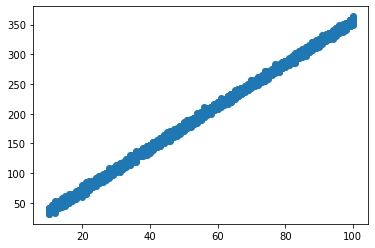

In [51]:
import matplotlib.pyplot as plt

plt.scatter(x = data2['TV'], y=data2['Sales'])


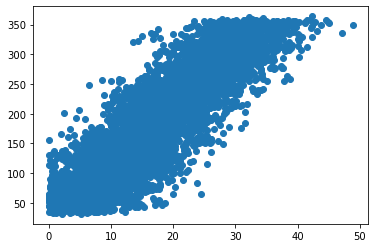

In [52]:
plt.scatter(x = data2['Radio'], y=data2['Sales'])

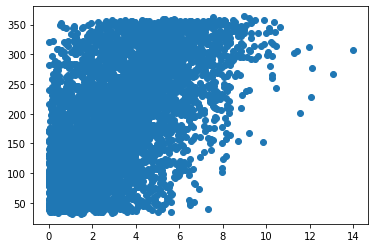

In [53]:
plt.scatter(x = data2['Social_Media'], y=data2['Sales'])

In [56]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.api import OLS, add_constant

# 상수항 미포함일 경우
# lm = LinearRegression(fit_intercept=Flase)
# 상수항을 포함할경우 fit_intercept=True 가 기본 값
# lm = LinearRegression().fit()

# 결측치 제거
q3 = data1.dropna()


x_list = ['TV', 'Radio', 'Social_Media']

lm = LinearRegression().fit(q3[x_list], q3.Sales)

In [57]:
# 사용할 수 있는 method 확인 코드
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [58]:
# 회귀 계수
lm.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

In [59]:
# 기울기
lm.intercept_

-0.1339630519422883

In [65]:
# ols('식의 모양을 적어줘야 함 : 'y~x1+x2-1', data=데이터셋 지정) -1 은 상수항 제외의 의미
form1 = 'Sales~'+'+'.join(x_list)
# 'Sales~TV+Radio+Social_Media'
# 분리시
# ols1 = ols(form1, data=q3)
# ols2 = ols1.fit()
# ols2

# 분리 안할 경우
ols1 = ols(form1, data=q3).fit()
dir(ols1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [67]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:19:27   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# 이상치 여부 체크해줌 (기준 bonf(p)) 0.05보다 크면 귀무가설(이상치가 아니다) 기각 / 대립가설(이상치다)
ols1.outlier_test()

,student_resid,unadj_p,bonf(p)
0,-0.719867,0.471644,1.0
1,0.177422,0.859185,1.0
2,1.456438,0.145341,1.0
3,0.940040,0.347247,1.0
4,1.124662,0.260792,1.0
...,...,...,...
4567,0.748484,0.454207,1.0
4568,-1.240494,0.214857,1.0
4569,2.397313,0.016556,1.0
4570,0.292277,0.770088,1.0


In [71]:
# 이상치의 갯수 확인
(ols1.outlier_test()['unadj_p'] < 0.05).sum()

219

In [72]:
# 이상치의 위치 확인
q3[ols1.outlier_test()['unadj_p'] < 0.05]

,TV,Radio,Social_Media,Influencer,Sales
93,72.0,25.406596,3.215455,Micro,262.401171
130,21.0,1.380311,5.286681,Mega,80.940725
136,88.0,26.009640,1.495601,Nano,321.046689
162,39.0,4.856123,0.874163,Macro,131.077255
179,64.0,23.081488,3.056298,Macro,219.568184
...,...,...,...,...,...
4433,50.0,22.728177,3.794120,Mega,184.040212
4448,82.0,28.920430,3.213067,Micro,285.392143
4452,36.0,15.393056,3.601162,Nano,119.220715
4477,61.0,20.789544,2.473938,Macro,225.822151


In [73]:
dir(ols1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [74]:
# params = coef_ 값과 같음
# 정렬이 안된상태, intercept 제외 필요
ols1.params

Intercept      -0.133963
TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

In [79]:
# ols는 시리즈 형태이므로 intercept 제외 가능
params1 = ols1.params.drop('Intercept')

In [84]:
# 함수 사용방법 확인
help(params1.sort_values())

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Se

In [83]:
# 내림차순 정렬
params1.sort_values(ascending=False)

TV              3.562570
Social_Media    0.004964
Radio          -0.003970
dtype: float64

In [ ]:
# ols('식의 모양을 적어줘야 함 : 'y~x1+x2-1', data=데이터셋 지정) -1 은 상수항 제외의 의미
form2 = 'Sales~'+'+'.join(x_list)
# 'Sales~TV+Radio+Social_Media'
# 분리시
# ols1 = ols(form1, data=q3)
# ols2 = ols1.fit()
# ols2

# 분리 안할 경우
ols2 = ols(form2, data=q3).fit()
dir(ols2)
ols2.summary

In [86]:
# 상수항 없이 OLS 구하는 방법(대문자 OLS 사용)
xx = q3[x_list]

,TV,Radio,Social_Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
4567,26.0,4.472360,0.717090
4568,71.0,20.610685,6.545573
4569,44.0,19.800072,5.096192
4570,71.0,17.534640,1.940873


In [87]:
# 대문자 OLS사용시 상수항 추가 방법
xx2 = add_constant(xx)
xx2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV,Radio,Social_Media
0,1.0,16.0,6.566231,2.907983
1,1.0,13.0,9.237765,2.409567
2,1.0,41.0,15.886446,2.913410
3,1.0,83.0,30.020028,6.922304
4,1.0,15.0,8.437408,1.405998
...,...,...,...,...
4567,1.0,26.0,4.472360,0.717090
4568,1.0,71.0,20.610685,6.545573
4569,1.0,44.0,19.800072,5.096192
4570,1.0,71.0,17.534640,1.940873


In [92]:
# OLS(y, X)
ols2 = OLS(q3.Sales, xx).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.951e+06
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                        0.00
Time:                        14:16:35   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4543   BIC:                                  2.276e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               3.5609      0.003   1133.941      0.000       3.555       3.567
Radio           -0.0039      0.010     -0.400      0.689      -0.023       0.015
Social_Media    -0.0013      0.024     -0.054      0.957      -0.049       0.047
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.038
Skew:                          -0.001   Prob(JB):                        0.981
Kurtosis:                       3.014   Cond. No.                         35.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# OLS(y, X)
ols2 = OLS(q3.Sales, xx2).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:16:53   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

In [132]:
data2 = pd.read_csv('dataset/DataSet_02.csv')
data2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [133]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [134]:
data2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [135]:
len(data2[(data2['Sex']== 'F') & (data2['BP']=='HIGH') & (data2['Cholesterol']=='NORMAL')]) / len(data2)

0.105

In [136]:
q1=pd.crosstab(index=[data2.Sex, data2.BP],
                columns=[data2.Cholesterol],
                normalize=True) # true == all 외에, 1을 적을 경우 행방향 열방향 정할 수 있음

q1

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

In [137]:
q1.loc[('F', 'HIGH'), 'NORMAL']

0.105

In [138]:
data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize=True)

Sex  BP      Cholesterol
F    HIGH    NORMAL         0.105
M    HIGH    NORMAL         0.105
     LOW     NORMAL         0.095
     NORMAL  HIGH           0.095
F    NORMAL  HIGH           0.090
M    HIGH    HIGH           0.090
F    HIGH    HIGH           0.085
M    LOW     HIGH           0.085
F    LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  NORMAL         0.060
M    NORMAL  NORMAL         0.050
dtype: float64

In [ ]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================

In [ ]:
# 1. 변수 변환
# 2. 빈도표 작성 (입력값)
# 3. 카이스퀘어 검정(범주형일 경우) : 변수별로 가장 연관성이 있는 변수, 카이스퀘어 검정은 2개만 비교 가능
# 4. 변수별 drug 와 반복 비교로 2~3번 수행
# 5. 연관성 있는 변수 추출 후 그중 가장 높은 p-value

In [139]:
q2 = data2.copy()

In [140]:
import numpy as np

# np.where(조건) => 조건에 해당하는 위치번호 리턴
# np.where(조건, 참인경우 실행문, 거짓인 경우 실행문) => 조건에 해당하는 위치번호 리턴

In [142]:
q2['Age_gr'] = np.where(q2['Age'] < 20, '10', 
                    np.where(q2['Age'] < 30, '20', 
                    np.where(q2['Age'] < 40, '30', 
                    np.where(q2['Age'] < 50, '40',
                    np.where(q2['Age'] < 60, '50', '60')))))

In [143]:
q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,DrugY,60
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50
196,16,M,LOW,HIGH,12.006,drugC,10
197,52,M,NORMAL,HIGH,9.894,drugX,50
198,23,M,NORMAL,NORMAL,14.020,drugX,20


In [144]:
q2['Na_K_gr'] = np.where(q2.Na_to_K <=10, 'Lv1',
                np.where(q2.Na_to_K <=20, 'Lv2',
                np.where(q2.Na_to_K <=30, 'Lv3','Lv4')))

In [145]:
q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr,Na_K_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20,Lv3
1,47,M,LOW,HIGH,13.093,drugC,40,Lv2
2,47,M,LOW,HIGH,10.114,drugC,40,Lv2
3,28,F,NORMAL,HIGH,7.798,drugX,20,Lv1
4,61,F,LOW,HIGH,18.043,DrugY,60,Lv2
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50,Lv2
196,16,M,LOW,HIGH,12.006,drugC,10,Lv2
197,52,M,NORMAL,HIGH,9.894,drugX,50,Lv1
198,23,M,NORMAL,NORMAL,14.020,drugX,20,Lv2


In [146]:
# 빈도표 작성
# 표본의 실제빈도, 이론적 빈도(가설기반 예상빈도)
temp = pd.crosstab(index = q2.Sex, 
                    columns= q2.Drug)
temp

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [147]:
# 카이스퀘어 검정
# H0(귀무가설) : 두개의 변수는 독립이다
# H1(대립가설) : 두개의 변수는 독립이 아니다
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(temp)
chi2

(2.119248418109203,
 0.7138369773987128,
 4,
 array([[43.68, 11.04,  7.68,  7.68, 25.92],
        [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [ ]:
'''
(2.119248418109203, # 카이스퀘어 값
 0.7138369773987128, # p-value 값, 결론 : 독립이다.
 4,                 # 자유도, (r - 1)(c - 1)
 array([[43.68, 11.04,  7.68,  7.68, 25.92],
        [47.32, 11.96,  8.32,  8.32, 28.08]])) # 독립일 경우 기대 빈도
'''

In [148]:
# p value 값 추출
chi2[1]

0.7138369773987128

In [150]:
# 반복적으로 수행( p-value 값을 뽑아오면 됨)
x_var = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

q2_out = []

for i in x_var:
    temp = pd.crosstab(index = q2[i], columns= q2.Drug)
    chi2 = chi2_contingency(temp)
    p_value = chi2[1]
    q2_out.append([i, chi2[0], p_value])
q2_out

[['Sex', 2.119248418109203, 0.7138369773987128],
 ['BP', 143.2328718496999, 5.0417334144665895e-27],
 ['Cholesterol', 19.609657681313475, 0.0005962588389856497],
 ['Age_gr', 46.440652324723914, 0.0007010113024729462],
 ['Na_K_gr', 93.31006327437028, 1.1254641594413981e-14]]

In [151]:
q2_out = pd.DataFrame(q2_out, columns=['x', 'chi', 'p_value'])
q2_out

,x,chi,p_value
0,Sex,2.119248,7.138370e-01
1,BP,143.232872,5.041733e-27
2,Cholesterol,19.609658,5.962588e-04
3,Age_gr,46.440652,7.010113e-04
4,Na_K_gr,93.310063,1.125464e-14


In [155]:
q2_out[q2_out['p_value'] < 0.05]

,x,chi,p_value
1,BP,143.232872,5.041733e-27
2,Cholesterol,19.609658,5.962588e-04
3,Age_gr,46.440652,7.010113e-04
4,Na_K_gr,93.310063,1.125464e-14


In [156]:
# 연관성 있는 변수의 갯수
len(q2_out[q2_out['p_value'] < 0.05])

4

In [154]:
# p-value의 max값
q2_out[q2_out['p_value'] < 0.05]['p_value'].max()

0.0007010113024729462

In [ ]:
# 답 : 4, 0.00070

In [ ]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

In [ ]:
# 1. 더미변수 만들기
# 2. 의사결정나무 수행
# 3. Root Node의 split feature/ split value 찾아야 함

In [157]:
q3 = data2.copy()
q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [159]:
q3['Sex_cd'] = np.where(q3.Sex =='M', 0, 1)
q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,1
4,61,F,LOW,HIGH,18.043,DrugY,1
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1
196,16,M,LOW,HIGH,12.006,drugC,0
197,52,M,NORMAL,HIGH,9.894,drugX,0
198,23,M,NORMAL,NORMAL,14.020,drugX,0


In [160]:
q3['BP_cd'] = np.where(q3.BP =='LOW', 0, 
            np.where(q3.BP =='NORMAL', 1, 2))
q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2
1,47,M,LOW,HIGH,13.093,drugC,0,0
2,47,M,LOW,HIGH,10.114,drugC,0,0
3,28,F,NORMAL,HIGH,7.798,drugX,1,1
4,61,F,LOW,HIGH,18.043,DrugY,1,0
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0
196,16,M,LOW,HIGH,12.006,drugC,0,0
197,52,M,NORMAL,HIGH,9.894,drugX,0,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1


In [161]:
q3['Ch_cd'] = np.where(q3.Cholesterol  =='NORMAL', 0, 1)
q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd,Ch_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2,1
1,47,M,LOW,HIGH,13.093,drugC,0,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,1,1
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0,1
196,16,M,LOW,HIGH,12.006,drugC,0,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,0,1,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1,0


[Text(209.25, 190.26, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(167.4, 135.9, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(83.7, 81.53999999999999, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(41.85, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 81.53999999999999, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(209.25, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 91\nvalue = [91, 0, 0, 0, 0]\nclass = DrugY')]

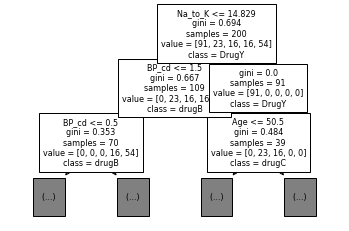

In [169]:
# 의사결정나무 실행

x_list =['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']
y_label = list(q3.Drug.unique())

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

dt = DecisionTreeClassifier().fit(q3[x_list], q3.Drug)
plot_tree(dt, max_depth=2, feature_names=x_list, class_names=y_label, precision=3, fontsize=8)

In [172]:
export_text(dt, max_depth=2, feature_names=x_list)

'|--- Na_to_K <= 14.83\n|   |--- BP_cd <= 1.50\n|   |   |--- BP_cd <= 0.50\n|   |   |   |--- truncated branch of depth 2\n|   |   |--- BP_cd >  0.50\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.50\n|   |   |--- Age <= 50.50\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.50\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.83\n|   |--- class: DrugY\n'

In [174]:
print(export_text(dt, max_depth=2, feature_names=x_list, decimals=3))

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- truncated branch of depth 2
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



In [ ]:
# 정답 : Na_to_K, 14.829

In [ ]:
# =============================================================================
# =============================================================================
# # 문제 03 유형(DataSet_03.csv 이용)
# 
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

In [175]:
data3 = pd.read_csv('dataset/DataSet_03.csv')
data3

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================

In [ ]:
# 1. 비율 생성
# 2. 비율 평균, 표준편차 구하기
# 3. 이상치 판정 구간 설정
# 4. 이상치 검출

In [181]:
q1 = data3.copy()
q1['forehead_ratio'] = q1['forehead_width_cm']/q1['forehead_height_cm']
q1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
0,1,11.8,6.1,1,0,1,1,Male,1.934426
1,0,14.0,5.4,0,0,1,0,Female,2.592593
2,0,11.8,6.3,1,1,1,1,Male,1.873016
3,0,14.4,6.1,0,1,1,1,Male,2.360656
4,1,13.5,5.9,0,0,0,0,Female,2.288136
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,2.666667
4997,1,11.9,5.4,0,0,0,0,Female,2.203704
4998,1,12.9,5.7,0,0,0,0,Female,2.263158
4999,1,13.2,6.2,0,0,0,0,Female,2.129032


In [189]:
xbar = q1['forehead_ratio'].mean() #평균
std = q1['forehead_ratio'].std() #표준편차
xbar, std

(2.233618718921447, 0.26452529699735255)

In [183]:
# 이상치 판정 구간
UB = xbar + 3*std
LB = xbar - 3*std

In [188]:
# 이상치 검출
q1[(q1['forehead_ratio'] > UB) | (q1['forehead_ratio'] < LB)]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
1641,1,15.5,5.1,1,1,1,1,Male,3.039216
1817,1,15.5,5.1,1,0,1,1,Male,3.039216
4948,0,15.5,5.1,1,1,1,1,Male,3.039216


In [200]:
((q1['forehead_ratio'] > UB) | (q1['forehead_ratio'] < LB)).sum()

3

In [198]:
len(q1[(q1['forehead_ratio'] > UB) | (q1['forehead_ratio'] < LB)])

3

In [ ]:
# 정답 : 3

In [ ]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.                                              # 독립인 T검정, ANOVA를 유도하는 문장
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

In [201]:
q1.gender.unique()

array(['Male', 'Female'], dtype=object)

In [202]:
gr_A=q1[q1['gender'] == 'Male']['forehead_ratio']
gr_B=q1[q1['gender'] == 'Female']['forehead_ratio']
gr_A

0       1.934426
2       1.873016
3       2.360656
5       1.911765
6       2.467742
          ...   
4987    1.951613
4992    2.014286
4994    1.842857
4995    1.782609
5000    2.851852
Name: forehead_ratio, Length: 2500, dtype: float64

In [203]:
gr_B

1       2.592593
4       2.288136
7       2.500000
8       2.203704
9       2.240741
          ...   
4993    1.966102
4996    2.666667
4997    2.203704
4998    2.263158
4999    2.129032
Name: forehead_ratio, Length: 2501, dtype: float64

In [206]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, bartlett
# ttest_1samp 독립인 일표본 T검정, 
# ttest_ind 독립인 이표본 T검정, 
# ttest_rel 대응인 이표본 T검정, 
# bartlett 등분산 검정, H0 : 등분산, H1: 이분산

bart1 = bartlett(gr_A, gr_B)
# pvalue 값 추출
np.round(bart1.pvalue,4)
# 0에 가까워 2분산이 됨

0.0

In [210]:
q2_out = ttest_ind(gr_A, gr_B, equal_var=False)
abs(q2_out.statistic) # 절대값


2.9994984197511543

In [211]:
round(abs(q2_out.statistic), 3) # 소숫점 제한

2.999

In [223]:
np.ceil(abs(q2_out.statistic) * 1000000)/1000000 # 소숫점 올림 함수

2.999499

In [222]:
np.floor(abs(q2_out.statistic)* 1000000)/1000000 # 소숫점 내림 함수

2.999498

In [ ]:
# 정답 : 2.999, Y

In [ ]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# train_test_split 의 random_state = 123

In [236]:
q3 = data3.copy()
q3

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [232]:
x_data = q3.drop('gender', axis=1)
y_data = q3.gender

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=123)

In [234]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [244]:

##########모델 검증
y_predict = model.predict(x_test)

print(f'테스트예측값:{y_predict}')

print(f'테스트실제값:{y_test}')

print(f'테스트정확도:{y_predict}')



테스트예측값:['Male' 'Male' 'Male' ... 'Female' 'Male' 'Male']
테스트실제값:2648      Male
2456      Male
4558      Male
4885      Male
92        Male
         ...  
734       Male
452     Female
2558    Female
1927      Male
4037      Male
Name: gender, Length: 1501, dtype: object
테스트정확도:['Male' 'Male' 'Male' ... 'Female' 'Male' 'Male']


# 강사님 풀이

In [237]:
train, test = train_test_split(q3, test_size=0.3, random_state=123)

In [238]:
x_list = q3.columns.drop('gender')

In [239]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression().fit(train[x_list], train.gender)
q3_out_class=logit.predict(test[x_list])
q3_out_class

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [241]:
q3_out_pr = logit.predict_proba(test[x_list])
q3_out_pr

array([[2.13366044e-02, 9.78663396e-01],
       [8.97496054e-05, 9.99910250e-01],
       [2.54440411e-01, 7.45559589e-01],
       ...,
       [9.63308173e-01, 3.66918274e-02],
       [8.55088606e-05, 9.99914491e-01],
       [1.37076239e-04, 9.99862924e-01]])

In [243]:
from sklearn.metrics import precision_score, classification_report

round(precision_score(test.gender, q3_out_class, pos_label='Male'), 2)

0.96

In [246]:
print(classification_report(test.gender, q3_out_class))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

